In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from src.auxiliar_functions import AuxFunctions
import numpy as np
import math
import string
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# Global style (paper-friendly)
plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "axes.linewidth": 1.0,
})

In [15]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

# Load merged dataset
df = pd.read_excel("../raw_data/viabilidad vs proliferacion_completo.xlsx")

print("Shape:", df.shape)
df.head()


Shape: (45, 5)


,Cell line,Enzyme,Treatment (%),Cell viability (% of control),Ki67-positive cells (% of control)
0,RQ,ASNase,50,118.353576,27.987743
1,RQ,GLNase,50,104.453441,36.465781
2,RQ,SDH,50,94.466937,49.846782
3,RQ,GO,50,86.504723,35.750766
4,RQ,ADI,50,93.522267,37.997957


In [16]:
print("Columns:")
for c in df.columns:
    print("-", c)

print("\nDtypes:")
print(df.dtypes)


Columns:
- Cell line
- Enzyme
- Treatment (%)
- Cell viability (% of control)
- Ki67-positive cells (% of control)

Dtypes:
Cell line                              object
Enzyme                                 object
Treatment (%)                           int64
Cell viability (% of control)         float64
Ki67-positive cells (% of control)    float64
dtype: object


In [17]:
print("Missing values per column:")
print(df.isna().sum())

keys = ["Cell line", "Enzyme", "Treatment (%)"]
dups = df.duplicated(subset=keys)

print("\nNumber of duplicated conditions:", dups.sum())
df[dups].head()


Missing values per column:
Cell line                             0
Enzyme                                0
Treatment (%)                         0
Cell viability (% of control)         0
Ki67-positive cells (% of control)    0
dtype: int64

Number of duplicated conditions: 0


,Cell line,Enzyme,Treatment (%),Cell viability (% of control),Ki67-positive cells (% of control)


In [18]:
treatment_order = [0, 50, 70, 90]
enzyme_order = ["ASNase", "ADI", "GLNase", "GO", "SDH"]
cell_order = ["RQ", "DFB", "MCF-7"]

df["Treatment (%)"] = pd.Categorical(df["Treatment (%)"], categories=treatment_order, ordered=True)
df["Enzyme"] = pd.Categorical(df["Enzyme"], categories=enzyme_order, ordered=True)
df["Cell line"] = pd.Categorical(df["Cell line"], categories=cell_order, ordered=True)


In [19]:
df[[
    "Cell viability (% of control)",
    "Ki67-positive cells (% of control)"
]].describe()


,Cell viability (% of control),Ki67-positive cells (% of control)
count,45.000000,45.000000
mean,79.342109,64.779256
std,30.083406,39.012387
min,20.184900,2.810304
25%,54.341737,37.997957
50%,83.860759,62.602459
75%,96.809986,84.371808
max,144.186047,146.604215


In [20]:
df.groupby(["Cell line", "Enzyme", "Treatment (%)"]).size().unstack(fill_value=0)


Treatment (%)     0  50  70  90
Cell line Enzyme               
RQ        ASNase  0   1   1   1
          ADI     0   1   1   1
          GLNase  0   1   1   1
          GO      0   1   1   1
          SDH     0   1   1   1
DFB       ASNase  0   1   1   1
          ADI     0   1   1   1
          GLNase  0   1   1   1
          GO      0   1   1   1
          SDH     0   1   1   1
MCF-7     ASNase  0   1   1   1
          ADI     0   1   1   1
          GLNase  0   1   1   1
          GO      0   1   1   1
          SDH     0   1   1   1

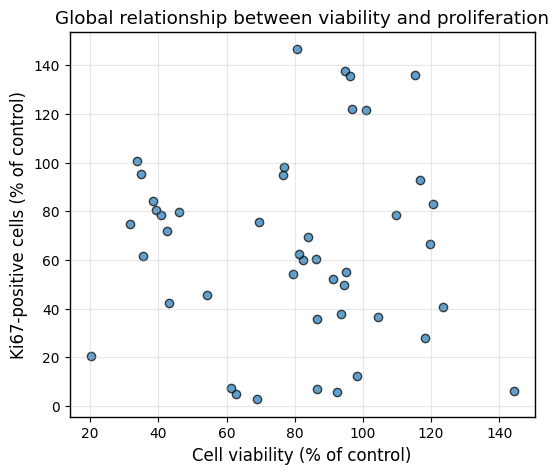

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(
    df["Cell viability (% of control)"],
    df["Ki67-positive cells (% of control)"],
    alpha=0.7,
    edgecolor="black"
)
plt.xlabel("Cell viability (% of control)")
plt.ylabel("Ki67-positive cells (% of control)")
plt.title("Global relationship between viability and proliferation")
plt.grid(alpha=0.3)
plt.show()


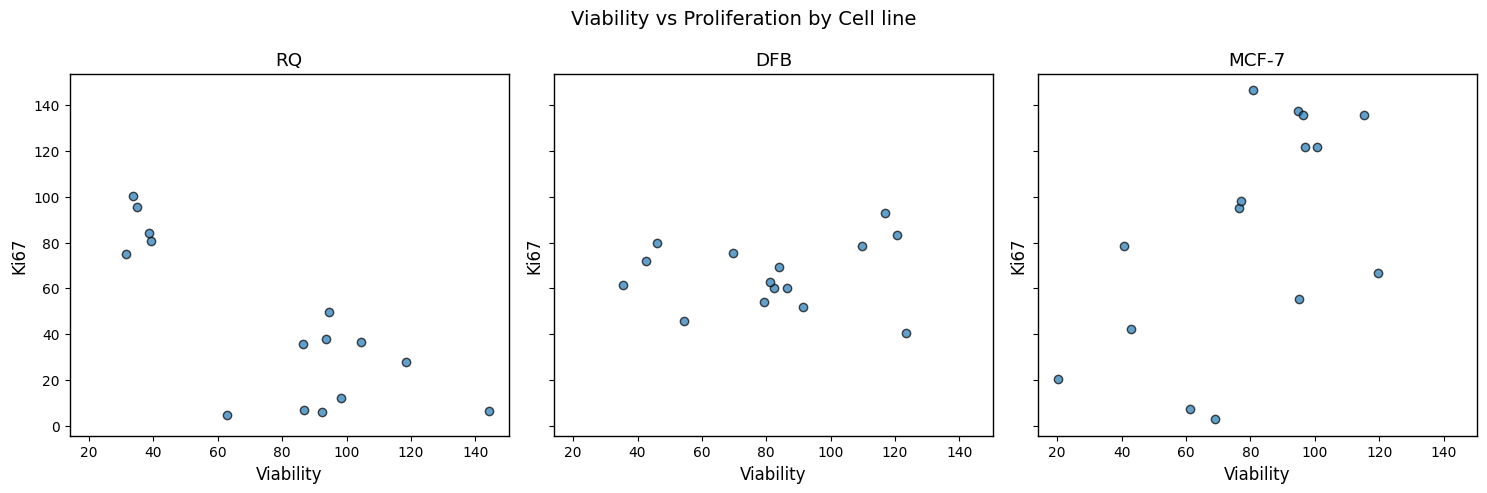

In [22]:
fig, axes = plt.subplots(1, df["Cell line"].nunique(), figsize=(15,5), sharex=True, sharey=True)

for ax, cl in zip(axes, df["Cell line"].cat.categories):
    sub = df[df["Cell line"] == cl]
    ax.scatter(
        sub["Cell viability (% of control)"],
        sub["Ki67-positive cells (% of control)"],
        alpha=0.7,
        edgecolor="black"
    )
    ax.set_title(cl)
    ax.set_xlabel("Viability")
    ax.set_ylabel("Ki67")

plt.suptitle("Viability vs Proliferation by Cell line", fontsize=14)
plt.tight_layout()
plt.show()


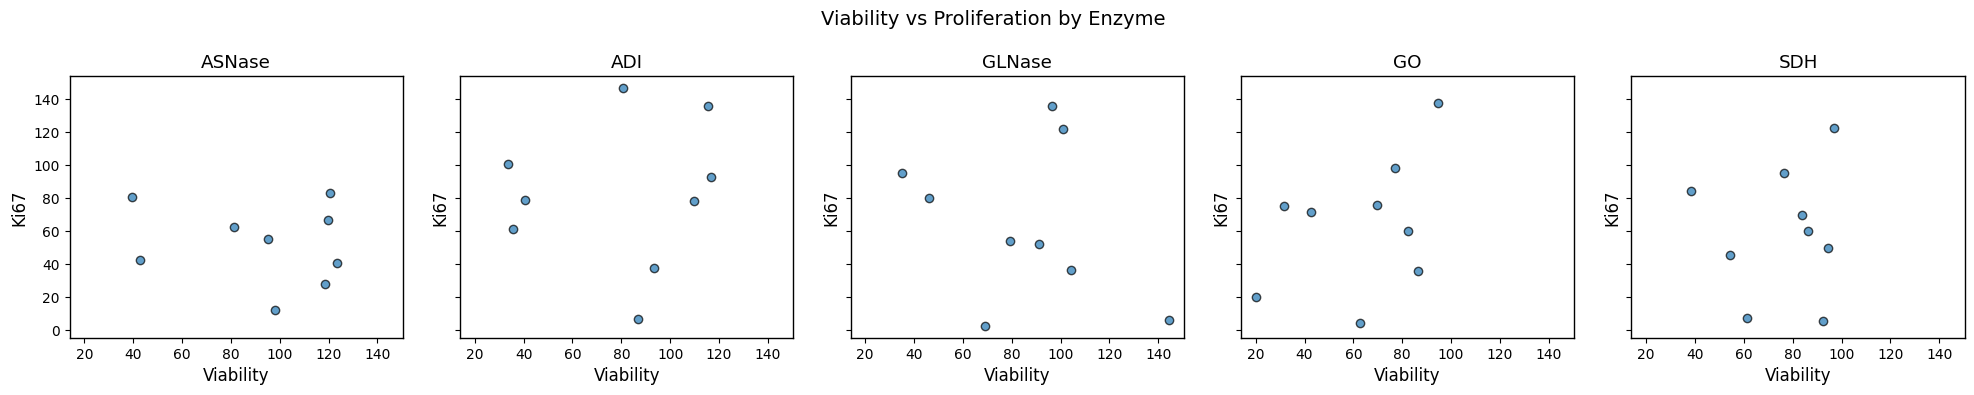

In [23]:
fig, axes = plt.subplots(1, df["Enzyme"].nunique(), figsize=(20,4), sharex=True, sharey=True)

for ax, enz in zip(axes, df["Enzyme"].cat.categories):
    sub = df[df["Enzyme"] == enz]
    ax.scatter(
        sub["Cell viability (% of control)"],
        sub["Ki67-positive cells (% of control)"],
        alpha=0.7,
        edgecolor="black"
    )
    ax.set_title(enz)
    ax.set_xlabel("Viability")
    ax.set_ylabel("Ki67")

plt.suptitle("Viability vs Proliferation by Enzyme", fontsize=14)
plt.tight_layout()
plt.show()


In [24]:
print("Global correlation:")
print(df[["Cell viability (% of control)", "Ki67-positive cells (% of control)"]].corr())

print("\nCorrelation by cell line:")
for cl in df["Cell line"].cat.categories:
    sub = df[df["Cell line"] == cl]
    corr = sub[["Cell viability (% of control)", "Ki67-positive cells (% of control)"]].corr().iloc[0,1]
    print(f"{cl}: {corr:.3f}")


Global correlation:
                                    Cell viability (% of control)  Ki67-positive cells (% of control)
Cell viability (% of control)                            1.000000                           -0.010835
Ki67-positive cells (% of control)                      -0.010835                            1.000000

Correlation by cell line:
RQ: -0.788
DFB: 0.120
MCF-7: 0.589


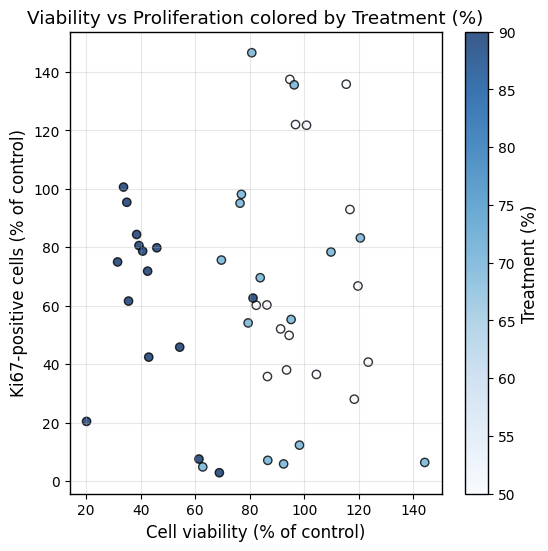

In [30]:
import matplotlib.cm as cm

plt.figure(figsize=(6,6))

scatter = plt.scatter(
    df["Cell viability (% of control)"],
    df["Ki67-positive cells (% of control)"],
    c=df["Treatment (%)"].astype(float),
    cmap="Blues",
    alpha=0.8,
    edgecolor="black"
)

plt.xlabel("Cell viability (% of control)")
plt.ylabel("Ki67-positive cells (% of control)")
plt.title("Viability vs Proliferation colored by Treatment (%)")
plt.grid(alpha=0.3)

cbar = plt.colorbar(scatter)
cbar.set_label("Treatment (%)")

plt.show()


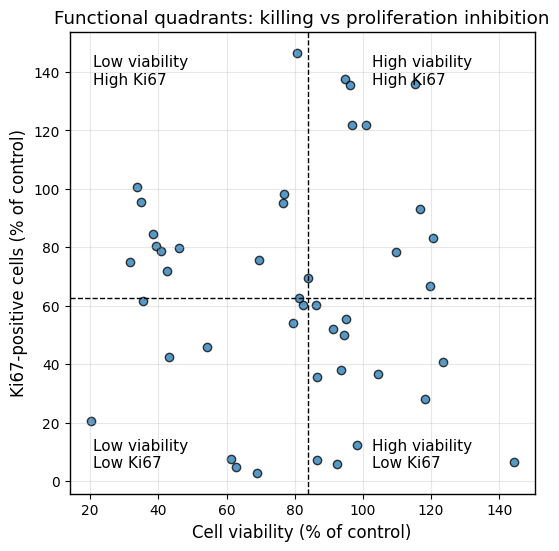

In [31]:
# Definir medianas como cortes (robusto sin control)
v_med = df["Cell viability (% of control)"].median()
k_med = df["Ki67-positive cells (% of control)"].median()

plt.figure(figsize=(6,6))
plt.axvline(v_med, color="black", linestyle="--", linewidth=1)
plt.axhline(k_med, color="black", linestyle="--", linewidth=1)

plt.scatter(
    df["Cell viability (% of control)"],
    df["Ki67-positive cells (% of control)"],
    alpha=0.75,
    edgecolor="black"
)

plt.text(0.05, 0.95, "Low viability\nHigh Ki67", transform=plt.gca().transAxes, va="top")
plt.text(0.65, 0.95, "High viability\nHigh Ki67", transform=plt.gca().transAxes, va="top")
plt.text(0.05, 0.05, "Low viability\nLow Ki67", transform=plt.gca().transAxes, va="bottom")
plt.text(0.65, 0.05, "High viability\nLow Ki67", transform=plt.gca().transAxes, va="bottom")

plt.xlabel("Cell viability (% of control)")
plt.ylabel("Ki67-positive cells (% of control)")
plt.title("Functional quadrants: killing vs proliferation inhibition")
plt.grid(alpha=0.3)
plt.show()


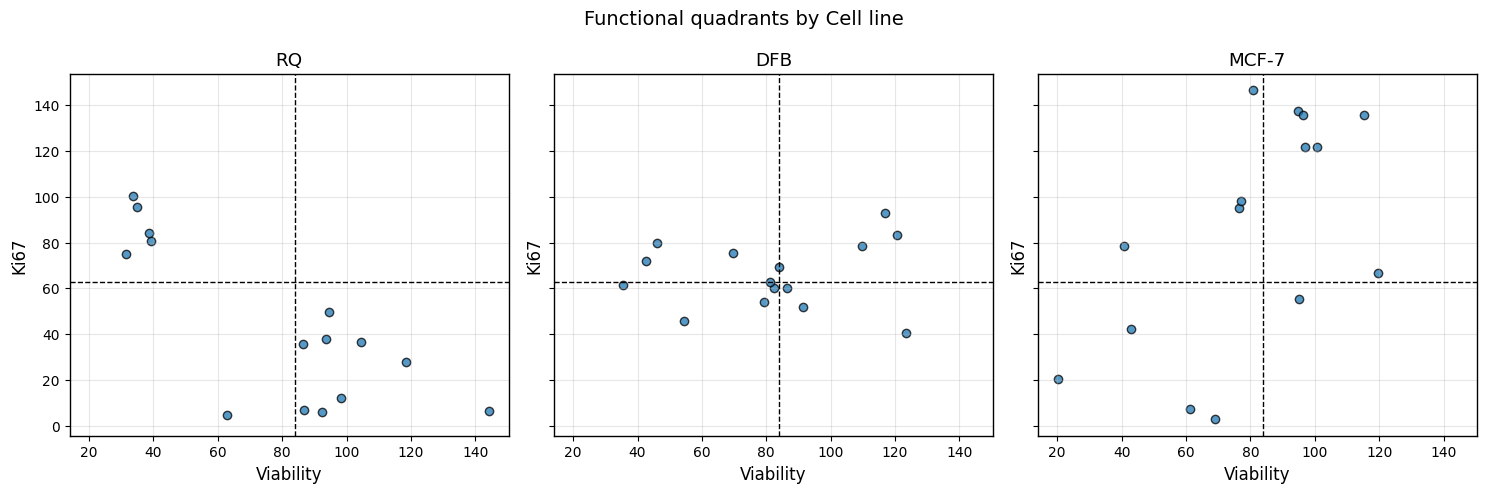

In [32]:
fig, axes = plt.subplots(1, df["Cell line"].nunique(), figsize=(15,5), sharex=True, sharey=True)

for ax, cl in zip(axes, df["Cell line"].cat.categories):
    sub = df[df["Cell line"] == cl]

    ax.axvline(v_med, color="black", linestyle="--", linewidth=1)
    ax.axhline(k_med, color="black", linestyle="--", linewidth=1)

    ax.scatter(
        sub["Cell viability (% of control)"],
        sub["Ki67-positive cells (% of control)"],
        alpha=0.75,
        edgecolor="black"
    )

    ax.set_title(cl)
    ax.set_xlabel("Viability")
    ax.set_ylabel("Ki67")
    ax.grid(alpha=0.3)

plt.suptitle("Functional quadrants by Cell line", fontsize=14)
plt.tight_layout()
plt.show()


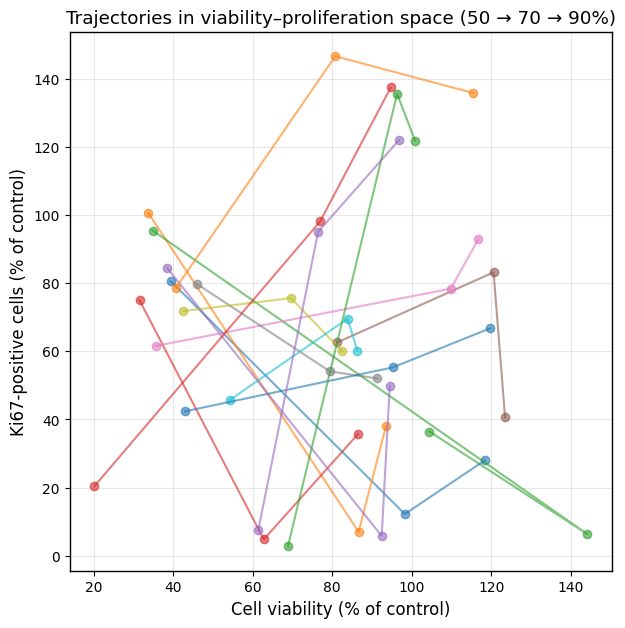

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))

for (cl, enz), sub in df.groupby(["Cell line", "Enzyme"]):
    sub = sub.sort_values("Treatment (%)")

    xs = sub["Cell viability (% of control)"].values
    ys = sub["Ki67-positive cells (% of control)"].values

    plt.plot(xs, ys, marker="o", alpha=0.6, linewidth=1.5)

plt.xlabel("Cell viability (% of control)")
plt.ylabel("Ki67-positive cells (% of control)")
plt.title("Trajectories in viability–proliferation space (50 → 70 → 90%)")
plt.grid(alpha=0.3)
plt.show()


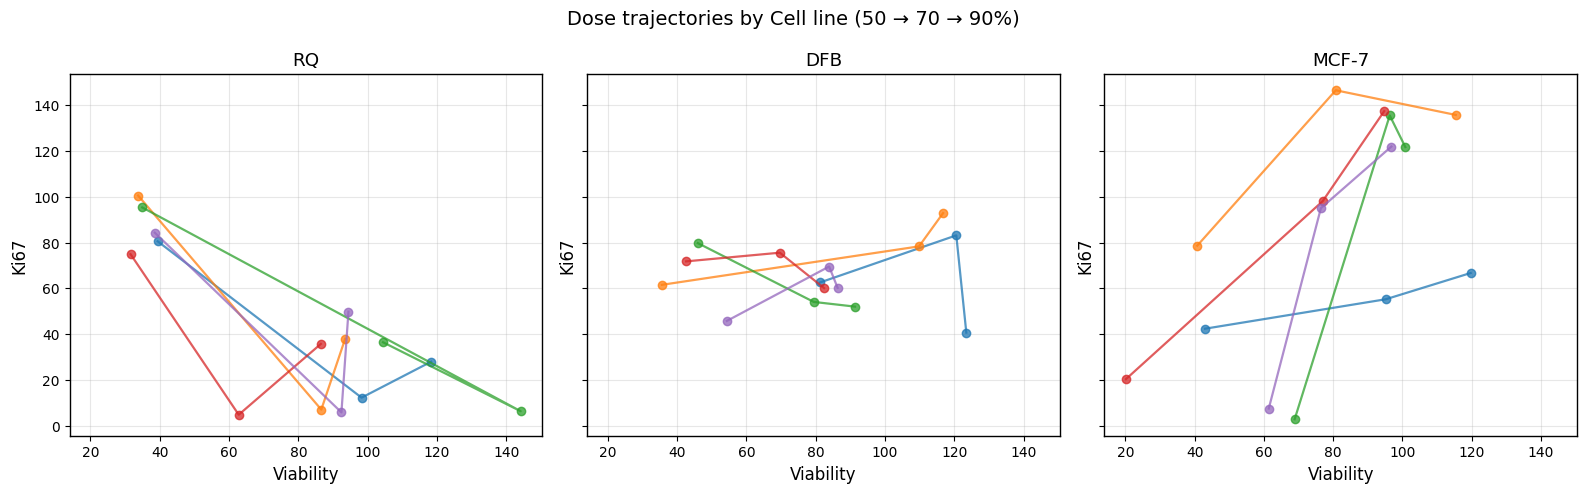

In [34]:
fig, axes = plt.subplots(1, df["Cell line"].nunique(), figsize=(16,5), sharex=True, sharey=True)

for ax, cl in zip(axes, df["Cell line"].cat.categories):
    sub_cl = df[df["Cell line"] == cl]

    for enz, sub in sub_cl.groupby("Enzyme"):
        sub = sub.sort_values("Treatment (%)")

        xs = sub["Cell viability (% of control)"].values
        ys = sub["Ki67-positive cells (% of control)"].values

        ax.plot(xs, ys, marker="o", linewidth=1.6, alpha=0.75)

    ax.set_title(cl)
    ax.set_xlabel("Viability")
    ax.set_ylabel("Ki67")
    ax.grid(alpha=0.3)

plt.suptitle("Dose trajectories by Cell line (50 → 70 → 90%)", fontsize=14)
plt.tight_layout()
plt.show()


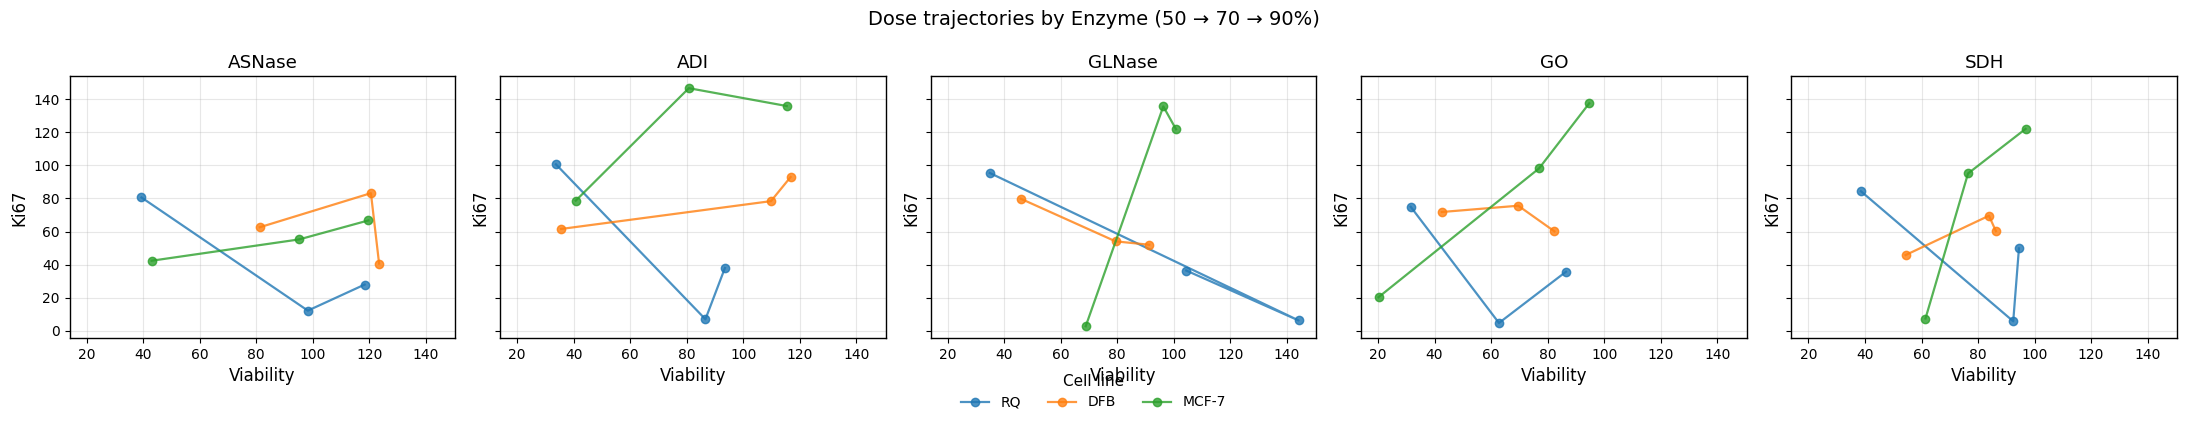

In [35]:
fig, axes = plt.subplots(1, df["Enzyme"].nunique(), figsize=(22,4), sharex=True, sharey=True)

for ax, enz in zip(axes, df["Enzyme"].cat.categories):
    sub_e = df[df["Enzyme"] == enz]

    for cl, sub in sub_e.groupby("Cell line"):
        sub = sub.sort_values("Treatment (%)")

        xs = sub["Cell viability (% of control)"].values
        ys = sub["Ki67-positive cells (% of control)"].values

        ax.plot(xs, ys, marker="o", linewidth=1.6, alpha=0.8, label=cl)

    ax.set_title(enz)
    ax.set_xlabel("Viability")
    ax.set_ylabel("Ki67")
    ax.grid(alpha=0.3)

# Legend global
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Cell line", loc="lower center", ncol=3, frameon=False, bbox_to_anchor=(0.5, -0.05))

plt.suptitle("Dose trajectories by Enzyme (50 → 70 → 90%)", fontsize=14)
plt.tight_layout()
plt.show()


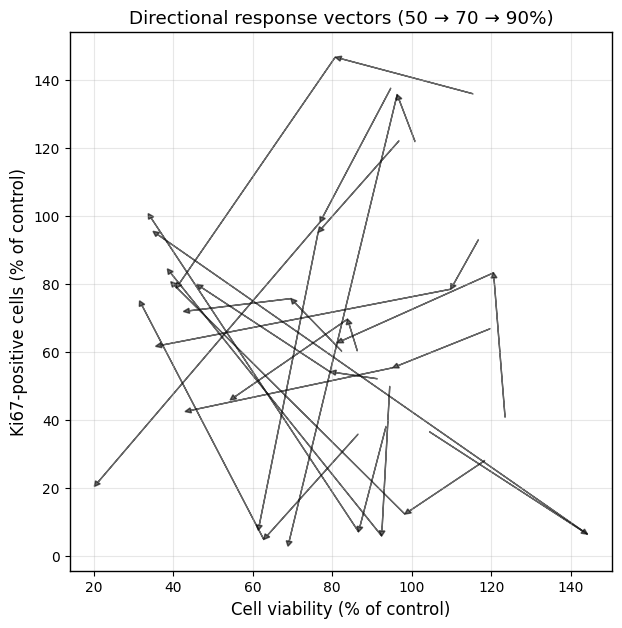

In [36]:
plt.figure(figsize=(7,7))

for (cl, enz), sub in df.groupby(["Cell line", "Enzyme"]):
    sub = sub.sort_values("Treatment (%)")

    xs = sub["Cell viability (% of control)"].values
    ys = sub["Ki67-positive cells (% of control)"].values

    for i in range(len(xs)-1):
        plt.arrow(
            xs[i], ys[i],
            xs[i+1] - xs[i],
            ys[i+1] - ys[i],
            head_width=1.5,
            head_length=1.5,
            length_includes_head=True,
            alpha=0.6,
            color="black"
        )

plt.xlabel("Cell viability (% of control)")
plt.ylabel("Ki67-positive cells (% of control)")
plt.title("Directional response vectors (50 → 70 → 90%)")
plt.grid(alpha=0.3)
plt.show()


In [37]:
import numpy as np

displacements = []

for (cl, enz), sub in df.groupby(["Cell line", "Enzyme"]):
    sub = sub.sort_values("Treatment (%)")

    xs = sub["Cell viability (% of control)"].values
    ys = sub["Ki67-positive cells (% of control)"].values

    if len(xs) >= 2:
        dx = xs[-1] - xs[0]
        dy = ys[-1] - ys[0]
        dist = np.sqrt(dx**2 + dy**2)

        displacements.append({
            "Cell line": cl,
            "Enzyme": enz,
            "Δviability_50_to_90": dx,
            "Δki67_50_to_90": dy,
            "Displacement_norm": dist
        })

df_disp = pd.DataFrame(displacements)
df_disp.sort_values("Displacement_norm", ascending=False).head(10)


,Cell line,Enzyme,Δviability_50_to_90,Δki67_50_to_90,Displacement_norm
13,MCF-7,GO,-74.544642,-117.096019,138.810595
12,MCF-7,GLNase,-31.956985,-118.969555,123.186866
14,MCF-7,SDH,-35.407829,-114.519906,119.868775
0,RQ,ASNase,-78.955986,52.604699,94.875192
11,MCF-7,ADI,-74.640277,-57.142857,94.002537
2,RQ,GLNase,-69.513682,58.937692,91.136181
6,DFB,ADI,-81.185547,-31.352459,87.029131
1,RQ,ADI,-59.787327,62.614913,86.574545
10,MCF-7,ASNase,-76.705654,-24.355972,80.479629
3,RQ,GO,-54.938458,39.223698,67.503575


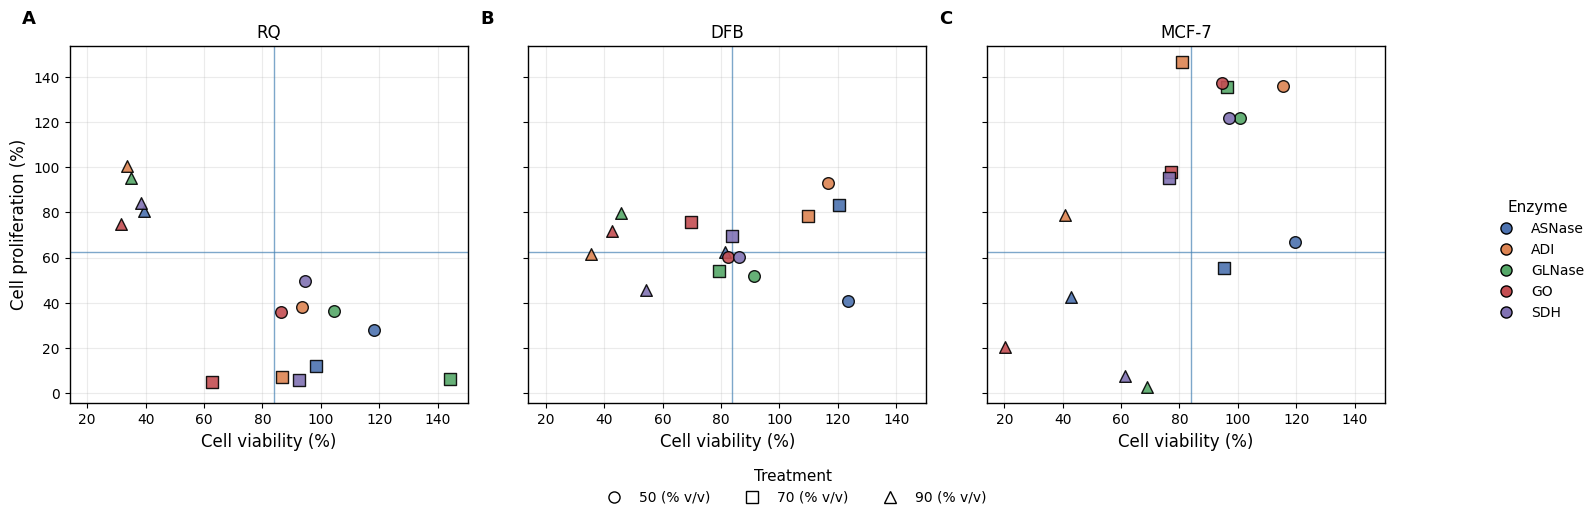

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ============================
# FIGURE: Viability vs Proliferation (1×3 by cell line)
# Color = Enzyme, Marker = Treatment (50/70/90), Quadrants = global medians
# ============================

# --- Column names (adjust here if needed)
x_col = "Cell viability (% of control)"
y_col = "Ki67-positive cells (% of control)"
cell_col = "Cell line"
enzyme_col = "Enzyme"
treat_col = "Treatment (%)"

# --- Categories (works with or without pandas Categorical)
cell_lines = list(df[cell_col].cat.categories) if hasattr(df[cell_col], "cat") else sorted(df[cell_col].unique())
enzymes = list(df[enzyme_col].cat.categories) if hasattr(df[enzyme_col], "cat") else sorted(df[enzyme_col].unique())
treatments_all = list(df[treat_col].cat.categories) if hasattr(df[treat_col], "cat") else sorted(df[treat_col].unique())

# --- Keep only real dose levels for this plot (exclude 0 if present)
treatments_plot = [t for t in treatments_all if float(t) != 0.0]

# --- Marker map (normalized to float keys)
marker_map = {
    50.0: "o",
    70.0: "s",
    90.0: "^",
}

# --- Palette for enzymes
enzyme_palette = dict(zip(enzymes, sns.color_palette("deep", n_colors=len(enzymes))))

# --- Quadrant cuts (global medians)
x_med = df[x_col].median()
y_med = df[y_col].median()

# --- Create figure (1×3)
fig, axes = plt.subplots(1, len(cell_lines), figsize=(16, 5), sharex=True, sharey=True)
panel_labels = list("ABC")

for ax, cl, panel_label in zip(axes, cell_lines, panel_labels):
    sub = df[df[cell_col] == cl].copy()

    # Quadrant lines
    ax.axvline(x_med, color="steelblue", linewidth=1, alpha=0.7)
    ax.axhline(y_med, color="steelblue", linewidth=1, alpha=0.7)

    # Scatter points
    for enz in enzymes:
        for t in treatments_plot:
            t_float = float(t)
            pts = sub[(sub[enzyme_col] == enz) & (sub[treat_col].astype(float) == t_float)]
            if pts.empty:
                continue

            ax.scatter(
                pts[x_col],
                pts[y_col],
                s=70,
                marker=marker_map.get(t_float, "o"),
                color=enzyme_palette[enz],
                edgecolor="black",
                alpha=0.9,
                zorder=3
            )

    ax.set_title(str(cl), fontsize=12)
    ax.grid(alpha=0.25)
    ax.set_xlabel("Cell viability (%)")

    # Panel label
    ax.text(-0.12, 1.05, panel_label, transform=ax.transAxes,
            fontsize=13, fontweight="bold", va="bottom", ha="left")

# Shared y label
axes[0].set_ylabel("Cell proliferation (%)")

# ============================
# Legends
# ============================

# Enzyme legend (color)
enzyme_handles = [
    plt.Line2D([0], [0], marker="o", linestyle="",
               color=enzyme_palette[e], label=str(e),
               markeredgecolor="black", markersize=8)
    for e in enzymes
]

# Treatment legend (marker) — only for plotted treatments
treat_handles = [
    plt.Line2D([0], [0], marker=marker_map.get(float(t), "o"), linestyle="",
               color="white",
               label=f"{float(t):g} (% v/v)",
               markeredgecolor="black", markerfacecolor="white",
               markersize=8)
    for t in treatments_plot
]

# Place legends
fig.legend(
    handles=enzyme_handles,
    title="Enzyme",
    loc="center right",
    frameon=False
)

fig.legend(
    handles=treat_handles,
    title="Treatment",
    loc="lower center",
    ncol=len(treatments_plot),
    frameon=False,
    bbox_to_anchor=(0.5, -0.05)
)

plt.tight_layout(rect=[0, 0.05, 0.88, 1])
plt.show()
